# Time Series: Data Preparation Exercises

<hr style="border:2px solid blue"> </hr>


In [1]:
import pandas as pd

import wrangle

Let's check to make sure my wrangle file is working as it should...

In [2]:
df = wrangle.get_superstore()
df.head()

Checking if file exists...
Creating New file...
Requesting Data...
Merging Data...
Storing Data...
Done!


,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
df = wrangle.get_superstore()
df.head()

Checking if file exists...
Reading Data from file...
Done!


,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


Looks like data was acquired sucessfully! Let's get to work! :)

### 1. Convert date column to datetime format.


In [4]:
# Let's see what our dtypes look like
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store_id       913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_state    913000 non-null  object 
 8   store_zipcode  913000 non-null  int64  
 9   item_brand     913000 non-null  object 
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


Everything looks good except `sales_date`, that should be a datetime dtype. Let's make it so!

In [5]:
# I'll even make sure proper date format is understood, to ensure quicker processing!
# Tue, 01 Jan 2013 00:00:00 GMT
# Note: Apparently the time is in 24hr format, not 12hr
df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y %H:%M:%S %Z')
df.sale_date.head()

0   2013-01-01 00:00:00+00:00
1   2013-01-02 00:00:00+00:00
2   2013-01-03 00:00:00+00:00
3   2013-01-04 00:00:00+00:00
4   2013-01-05 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]

### 2. Plot the distribution of sale_amount and item_price.


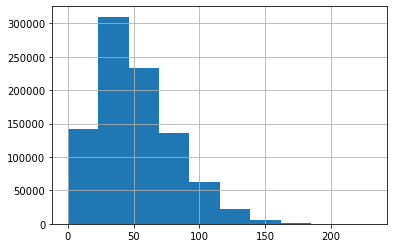

In [6]:
# Distribustion of sale_amount
df.sale_amount.hist();

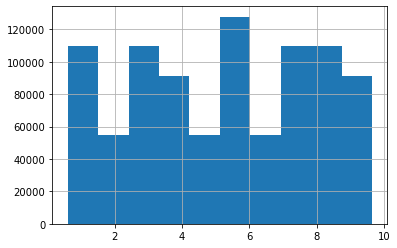

In [7]:
# Distribution of item_price
df.item_price.hist();

### 3. Set the index to be the datetime variable.


In [8]:
# Setting the 'sale_date' column as the Index and sorting that new Index:
df = df.set_index('sale_date').sort_index()
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 4. Add a 'month' and 'day of week' column to your dataframe.


In [9]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_of_week

In [10]:
# Twelve values, looks like I got what I wanted!
df.month.value_counts()

1     77500
3     77500
5     77500
7     77500
8     77500
10    77500
12    77500
4     75000
6     75000
9     75000
11    75000
2     70500
Name: month, dtype: int64

In [11]:
# 0-6 represents Monday-Sunday
df.day_of_week.value_counts()

1    130500
2    130500
3    130500
4    130500
5    130500
6    130500
0    130000
Name: day_of_week, dtype: int64

### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [12]:
# Assuming sale_amount is quantity of the item being purchased....
df['sales_total'] = df.sale_amount * df.item_price

In [13]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,1,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,294.00


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [14]:
def fast_food():
    # Obtain the dataframe
    df = get_superstore()
    # Make sure proper date format is understood, to ensure quicker processing
    df.sale_date = pd.to_datetime(df.sale_date, format = '%a, %d %b %Y %H:%M:%S %Z')
    # Setting the 'sale_date' column as the Index and sorting that new Index:
    df = df.set_index('sale_date').sort_index()
    # Feature Engineering
    df['month'] = df.index.month
    df['day_of_week'] = df.index.day_of_week
    df['sales_total'] = df.sale_amount * df.item_price
    return df

## Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:



In [15]:
OPS = pd.read_csv('opsd_germany_daily.csv')
OPS.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [16]:
# It looks like it's reading the index in as a separate column so I'm gonna drop that
OPS = OPS.drop(columns='Unnamed: 0', axis=1)
OPS.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### 1. Convert date column to datetime format.


In [17]:
OPS.Date = pd.to_datetime(OPS.Date, format = '%Y-%M-%d')

### 2. Plot the distribution of each of your variables.


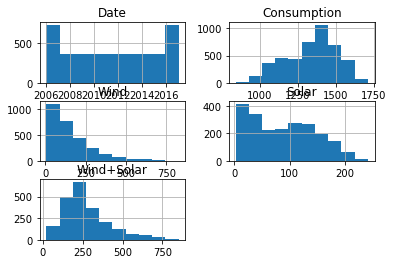

In [18]:
OPS.hist();

### 3. Set the index to be the datetime variable.


In [19]:
OPS = OPS.set_index('Date').sort_index()
OPS.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01 00:01:00,1069.184,NaN,NaN,NaN
2006-01-01 00:02:00,1582.134,NaN,NaN,NaN
2006-01-01 00:03:00,1531.173,NaN,NaN,NaN
2006-01-01 00:04:00,1207.769,NaN,NaN,NaN
2006-01-01 00:05:00,986.698,NaN,NaN,NaN


### 4. Add a month and a year column to your dataframe.


In [20]:
OPS['month'] = OPS.index.month
OPS['year'] = OPS.index.year
OPS.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01 00:01:00,1069.184,NaN,NaN,NaN,1,2006
2006-01-01 00:02:00,1582.134,NaN,NaN,NaN,1,2006
2006-01-01 00:03:00,1531.173,NaN,NaN,NaN,1,2006
2006-01-01 00:04:00,1207.769,NaN,NaN,NaN,1,2006
2006-01-01 00:05:00,986.698,NaN,NaN,NaN,1,2006


### 5. Fill any missing values.


In [21]:
OPS.describe()

,Consumption,Wind,Solar,Wind+Solar,month,year
count,4383.000000,2920.000000,2188.000000,2187.000000,4383.0,4383.000000
mean,1338.675836,164.814173,89.258695,272.663481,1.0,2011.500342
std,165.775710,143.692732,58.550099,146.319884,0.0,3.452347
min,842.395000,5.757000,1.968000,21.478000,1.0,2006.000000
25%,1217.859000,62.353250,35.179250,172.185500,1.0,2008.500000
50%,1367.123000,119.098000,86.407000,240.991000,1.0,2012.000000
75%,1457.761000,217.900250,135.071500,338.988000,1.0,2014.500000
max,1709.568000,826.278000,241.580000,851.556000,1.0,2017.000000


In [22]:
OPS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 00:01:00 to 2017-01-31 00:12:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [23]:
OPS.isna()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01 00:01:00,False,True,True,True,False,False
2006-01-01 00:02:00,False,True,True,True,False,False
2006-01-01 00:03:00,False,True,True,True,False,False
2006-01-01 00:04:00,False,True,True,True,False,False
2006-01-01 00:05:00,False,True,True,True,False,False
...,...,...,...,...,...,...
2017-01-31 00:05:00,False,False,False,False,False,False
2017-01-31 00:07:00,False,False,False,False,False,False
2017-01-31 00:08:00,False,False,False,False,False,False


In [24]:
OPS.fillna(0, inplace=True)
OPS.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01 00:01:00,1069.184,0.0,0.0,0.0,1,2006
2006-01-01 00:02:00,1582.134,0.0,0.0,0.0,1,2006
2006-01-01 00:03:00,1531.173,0.0,0.0,0.0,1,2006
2006-01-01 00:04:00,1207.769,0.0,0.0,0.0,1,2006
2006-01-01 00:05:00,986.698,0.0,0.0,0.0,1,2006


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [25]:
def prepared_energy():
    # Collecting the data
    OPS = pd.read_csv('opsd_germany_daily.csv')
    # Setting date as index
    OPS = OPS.set_index('Date').sort_index()
    # Feature Engineering
    OPS['month'] = OPS.index.month
    OPS['year'] = OPS.index.year
    # Filling Nulls
    OPS.fillna(0, inplace=True)
    return OPS